In [2]:
from thinkbayes import Suite
import matplotlib.pyplot as plt
import math

In [8]:
# Let `N` is a number of locomotives on the railroad
#
# Let estimate that there are 4 companies per a railroad
COMPANIES_PER_RAILROAD = 4

#
# One of possible distributions
# - one company of size k
# - one company of size k/2
# - two companies of size k/4
#
def get_sizes_of_companies(total):
    if total < 4:
        return [total]
    if total < 8:
        return [total/2, total/2]
    c1 = total / 2
    c2 = total / 4
    c3 = total / 8
    c4 = total / 8
    return [c1, c2, c3, c4]

In [11]:
print('1:', get_sizes_of_companies(1))
print('3:', get_sizes_of_companies(3))
print('4:', get_sizes_of_companies(4))
print('7:', get_sizes_of_companies(7))
print('8:', get_sizes_of_companies(8))
print('16:', get_sizes_of_companies(16))

1: [1]
3: [3]
4: [2.0, 2.0]
7: [3.5, 3.5]
8: [4.0, 2.0, 1.0, 1.0]
16: [8.0, 4.0, 2.0, 2.0]


In [22]:
def likelihood(data, hypo):
    companies = get_sizes_of_companies(hypo)
    possible_locos = 0.0
    for company_size in companies:
        if company_size >= data:
            possible_locos += 1
    return possible_locos / hypo

In [23]:
print('1/1:', likelihood(1, 1)) # 1.0
print('1/3:', likelihood(1, 3)) # 1/3
print('3/3:', likelihood(1, 3)) # 1/3
print('1/4:', likelihood(1, 4)) # 1/2
print('2/4:', likelihood(2, 4)) # 1/2
print('3/4:', likelihood(3, 4)) # 0
print('2/16:', likelihood(2, 16)) # 4/16
print('4/16:', likelihood(4, 16)) # 2/16
print('8/16:', likelihood(8, 16)) # 1/16

1/1: 1.0
1/3: 0.3333333333333333
3/3: 0.3333333333333333
1/4: 0.5
2/4: 0.5
3/4: 0.0
2/16: 0.25
4/16: 0.125
8/16: 0.0625


In [24]:
class MultiTrain(Suite):
    def __init__(self, hypos):
        super().__init__(self, hypos)
        
        for k in hypos:
            self.Set(k, 1)
            
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        return likelihood(data, hypo)

In [25]:
def plot_distro(suite):
    hs, ps = [], []
    for hypo, prob in sorted(suite.Items()):
        hs.append(hypo)
        ps.append(prob)
    plt.plot(hs, ps)
    plt.xlabel('Number of trains')
    plt.ylabel('Probability');

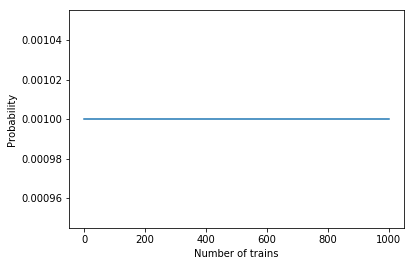

In [29]:
locos = MultiTrain(range(1, 1001))
plot_distro(locos)

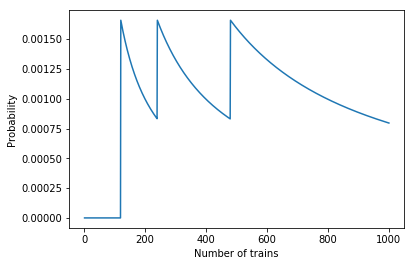

In [30]:
locos.Update(60)
plot_distro(locos)

In [31]:
print(locos.Mean())

534.0592932490797


In [33]:
upper_bounds = [500, 1000, 2000]
for bound in upper_bounds:
    locos = MultiTrain(range(1, bound + 1))
    locos.Update(60)
    locos.Update(30)
    locos.Update(90)
    mean = locos.Mean()
    cdf = locos.MakeCdf()
    perc05 = cdf.Percentile(5)
    perc95 = cdf.Percentile(95)
    print('Upper bound: {}, posterior mean: {}, interval: {}-{}'.format(bound, mean, perc05, perc95))

Upper bound: 500, posterior mean: 327.18582410821386, interval: 193-485
Upper bound: 1000, posterior mean: 488.59850366435603, interval: 206-902
Upper bound: 2000, posterior mean: 606.4134824178647, interval: 211-1389


In [34]:
#

In [35]:
class MultiTrainPower(Suite):
    def __init__(self, hypos):
        super().__init__(self, hypos)
        
        for k in hypos:
            self.Set(k, 1/k)
            
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        return likelihood(data, hypo)

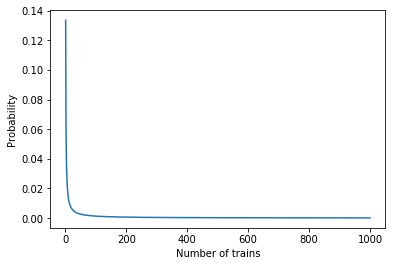

In [36]:
locos = MultiTrainPower(range(1, 1001))
plot_distro(locos)

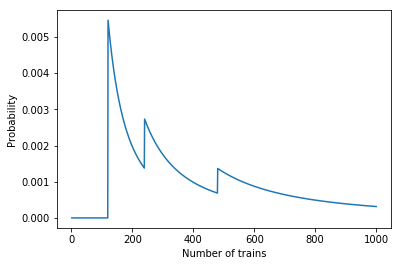

In [37]:
locos.Update(60)
plot_distro(locos)

In [38]:
print(locos.Mean())

395.20709846807733


In [40]:
upper_bounds = [500, 1000, 2000]
for bound in upper_bounds:
    locos = MultiTrainPower(range(1, bound + 1))
    locos.Update(60)
    locos.Update(30)
    locos.Update(90)
    mean = locos.Mean()
    cdf = locos.MakeCdf()
    perc05 = cdf.Percentile(5)
    perc95 = cdf.Percentile(95)
    print('Upper bound: {}, posterior mean: {}, interval: {}-{}'.format(bound, mean, perc05, perc95))

Upper bound: 500, posterior mean: 302.6510685404998, interval: 187-472
Upper bound: 1000, posterior mean: 395.8221983374772, interval: 190-811
Upper bound: 2000, posterior mean: 438.0928133068193, interval: 191-985
